In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("data/solidWhiteCurve.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

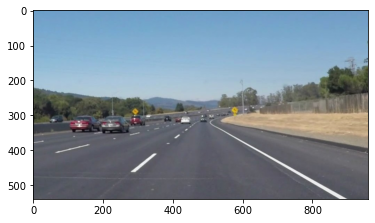

In [3]:
plt.imshow(img)

In [4]:
import numpy as np
def focus(img , vec):
    mask = np.zeros_like(img)
    if len(img.shape) == 3:
        mc = (255,) * img.shape[2]
    else:
        mc = 255
    cv2.fillPoly(mask, vec, mc)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [5]:
height, width = img.shape[0:2]
cc = focus(img , np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))

In [6]:
cc.shape

(540, 960, 3)

Text(0.5, 1.0, 'cc')

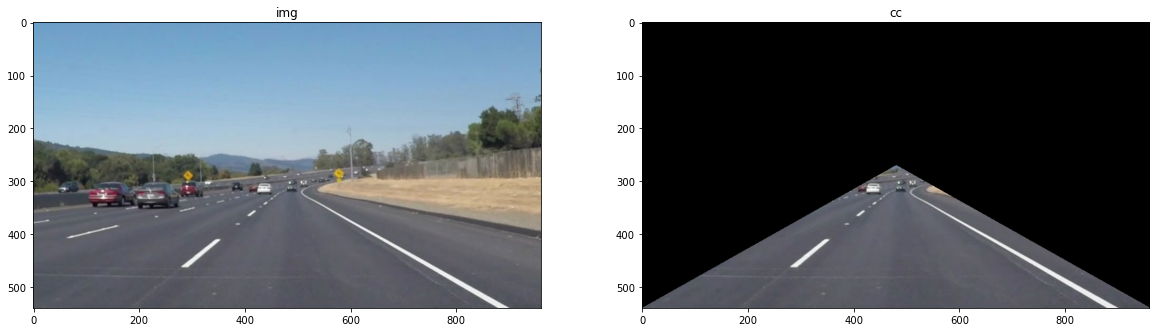

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("img")

plt.subplot(1,2,2)
plt.imshow(cc, cmap="gray")
plt.title("cc")

In [8]:
gray = cv2.cvtColor(cc , cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'cc')

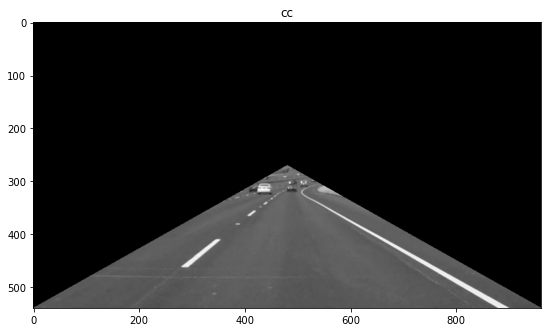

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("cc")

In [10]:
ci = cv2.Canny(gray, 200, 300)

Text(0.5, 1.0, 'cc')

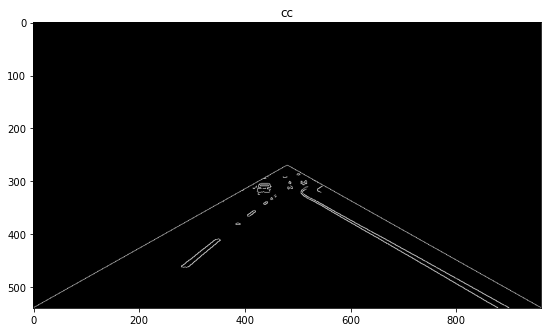

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(ci, cmap="gray")
plt.title("cc")

In [12]:
cic = focus(ci, np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))

Text(0.5, 1.0, 'cic')

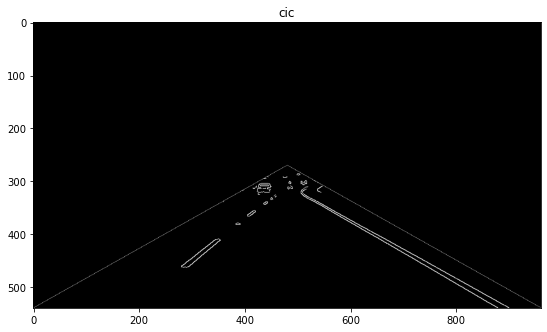

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cic, cmap="gray")
plt.title("cic")

In [43]:
Lines = cv2.HoughLinesP(cic, rho=6, theta=np.pi/180,threshold=180, 
                        lines=np.array([]), minLineLength=40, maxLineGap=25)

# threshold = 180

In [15]:
print(Lines)

[[[629 389 898 538]]

 [[650 406 758 470]]

 [[740 458 873 537]]

 [[481 311 594 374]]

 [[634 397 703 438]]

 [[480 270 618 347]]

 [[490 313 694 426]]

 [[388 382 457 326]]

 [[294 374 471 275]]

 [[387 382 487 309]]

 [[642 361 837 470]]

 [[293 462 353 411]]

 [[489 310 550 346]]

 [[752 458 820 495]]

 [[486 309 530 335]]]


In [16]:
LineImg= np.zeros((cic.shape[0] , cic.shape[1], 3), dtype=np.uint8)

In [17]:
cic.shape

(540, 960)

In [18]:
LineImg.shape

(540, 960, 3)

In [19]:
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        cv2.line(LineImg, (x1, y1), (x2, y2), [255,255,0],2)

In [20]:
merged = np.copy(img)

In [21]:
merged = cv2.addWeighted(merged, 0.8, LineImg, 1.0, 0.0)

Text(0.5, 1.0, 'merged')

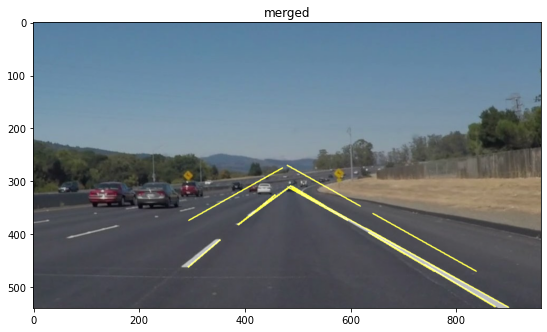

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(merged, cmap="gray")
plt.title("merged")

In [23]:
xleft=[]
yleft=[]
xright=[]
yright=[]
import math
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        slope =(y2 - y1)/(x2 - x1)
    if math.fabs(slope) < 0.5:
        continue
    if slope <= 0:
        xleft.extend([x1, x2])
        yleft.extend([y1, y2])
    else:
        xright.extend([x1, x2])
        yright.extend([y1, y2])

In [24]:
xleft

[388, 457, 294, 471, 387, 487, 293, 353]

In [25]:
m = np.copy(img)

In [26]:
min_y = int(m.shape[0] * (3 / 5))
max_y = int(m.shape[0])
poly_left = np.poly1d(np.polyfit(yleft,xleft,deg=1))

left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(yright,xright,deg=1))

right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

In [27]:
z = [[[left_x_start, max_y, left_x_end, min_y],[right_x_start, max_y, right_x_end, min_y]]]

In [28]:
z

[[[199, 540, 436, 324], [891, 540, 527, 324]]]

In [29]:
Li = np.zeros((cic.shape[0] , cic.shape[1], 3), dtype=np.uint8)

In [30]:
for cod in z:
    for x1, y1, x2, y2 in cod:
        cv2.line(Li, (x1, y1), (x2, y2), [255,255,0],2)

Text(0.5, 1.0, 'img')

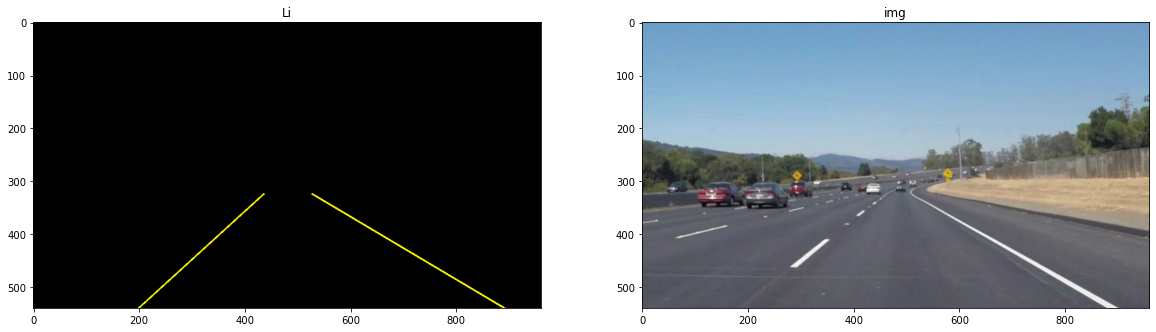

In [31]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.title("img")



In [32]:
m = np.copy(img)

In [33]:
m = cv2.addWeighted(m, 0.8, Li, 1.0, 0.0)

Text(0.5, 1.0, 'm')

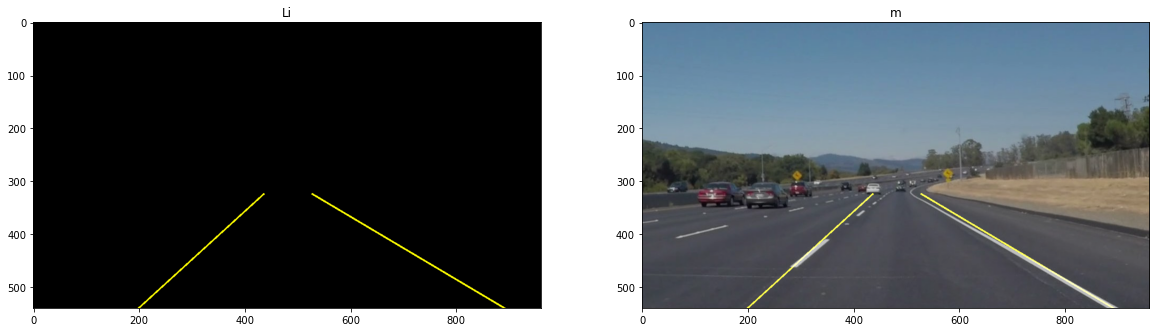

In [34]:
plt.figure(figsize=(20,20))


plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(m, cmap="gray")
plt.title("m")

In [35]:
import numpy as np
def roi(img , vec):
    mask = np.zeros_like(img)
    if len(img.shape) == 3:
        mc = (255,) * img.shape[2]
    else:
        mc = 255
    cv2.fillPoly(mask, vec, mc)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [36]:
def pipe(img):
    height, width = img.shape[0:2]
    cc = roi(img , np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))
    gray = cv2.cvtColor(cc , cv2.COLOR_RGB2GRAY)
    ci = cv2.Canny(gray, 200, 300)
    cic = roi(ci, np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))
    Lines = cv2.HoughLinesP(cic, rho=6, theta=np.pi/180,threshold=15, 
                        lines=np.array([]), minLineLength=40, maxLineGap=25)
    
    # https://amanmander123.github.io/finding-lane-lines-on-the-road.html
    m = np.copy(img)
    xleft=[]
    yleft=[]
    xright=[]
    yright=[]
    import math
    for cod in Lines:
        for x1, y1, x2, y2 in cod:
            slope =(y2 - y1)/(x2 - x1)
        if math.fabs(slope) < 0.5:
            continue
        if slope <= 0:
            xleft.extend([x1, x2])
            yleft.extend([y1, y2])
        else:
            xright.extend([x1, x2])
            yright.extend([y1, y2])

    min_y = int(m.shape[0] * (3 / 5))
    max_y = int(m.shape[0])
    poly_left = np.poly1d(np.polyfit(yleft,xleft,deg=1))

    left_x_start = int(poly_left(max_y))
    left_x_end = int(poly_left(min_y))

    poly_right = np.poly1d(np.polyfit(yright,xright,deg=1))

    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))
    
    z = [[[left_x_start, max_y, left_x_end, min_y],[right_x_start, max_y, right_x_end, min_y]]]
    Li = np.zeros((cic.shape[0] , cic.shape[1], 3), dtype=np.uint8)
    for cod in z:
        for x1, y1, x2, y2 in cod:
            cv2.line(Li, (x1, y1), (x2, y2), [255,255,0],2)
    
    m = cv2.addWeighted(m, 0.8, Li, 1.0, 0.0)
    return m

In [37]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"

In [38]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [39]:
in1 = VideoFileClip("data/vids/solidWhiteRight.mp4")
frames = in1.fl_image(pipe)
frames.write_videofile("data/vids/solidWhiteRight_output.mp4", audio=False)

Moviepy - Building video data/vids/solidWhiteRight_output.mp4.
Moviepy - Writing video data/vids/solidWhiteRight_output.mp4



Moviepy - Done !
Moviepy - video ready data/vids/solidWhiteRight_output.mp4
